<a href="https://colab.research.google.com/github/MrData-Science/Clasification-Models/blob/main/Modelos_de_clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelos de clasificación
Los modelos de clasificación en machine learning son algoritmos diseñados para predecir la clase o categoría a la que pertenece un conjunto de datos. Estos modelos se utilizan cuando queremos asignar una etiqueta o categoría a nuevos datos en función de patrones identificados en los datos de entrenamiento.

## Carga de datos

The dataset consists of several news articles, each represented by numerical features:

ID: A unique identifier for each article.

Word_Count: The total number of words in the article.

Sentence_Length: The average length of sentences in the article.

Unique_Words: The number of unique words in the article.

Average_Word_Length: The average length of words in the article.

Label: A binary label indicating whether the article is real (1) or fake (0).

In [18]:
import pandas as pd
import numpy as np

In [19]:
df = pd.read_csv('/content/Fake News Detection Dataset.csv')
df

,ID,Word_Count,Number_of_Sentence,Unique_Words,Average_Word_Length,Label
0,1606,10,4,24,6.176750,1
1,3718,10,8,25,5.826770,1
2,2634,10,7,18,4.619040,1
3,5560,10,6,18,4.961424,1
4,7494,10,4,21,4.114324,1
...,...,...,...,...,...,...
4495,1179,41,7,12,6.963924,0
4496,9445,100,5,15,3.136755,1
4497,4149,100,8,18,3.376823,1
4498,9877,85,14,42,5.331393,0


## Analisis exploratorio

### Resumen de los datos

In [20]:
df.head(5)

,ID,Word_Count,Number_of_Sentence,Unique_Words,Average_Word_Length,Label
0,1606,10,4,24,6.176750,1
1,3718,10,8,25,5.826770,1
2,2634,10,7,18,4.619040,1
3,5560,10,6,18,4.961424,1
4,7494,10,4,21,4.114324,1


In [21]:
df.shape

(4500, 6)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   4500 non-null   int64  
 1   Word_Count           4500 non-null   int64  
 2   Number_of_Sentence   4500 non-null   int64  
 3   Unique_Words         4500 non-null   int64  
 4   Average_Word_Length  4500 non-null   float64
 5   Label                4500 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 211.1 KB


### Estadistica descriptiva

In [23]:
df.describe()

,ID,Word_Count,Number_of_Sentence,Unique_Words,Average_Word_Length,Label
count,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000
mean,5469.140000,53.934000,8.934667,24.943333,4.968105,0.329556
std,2599.193059,24.872743,3.407847,11.540708,1.152394,0.470104
min,1002.000000,10.000000,4.000000,5.000000,3.000385,0.000000
25%,3228.750000,35.000000,6.000000,17.000000,3.980553,0.000000
50%,5449.500000,52.000000,9.000000,22.000000,4.906200,0.000000
75%,7706.750000,75.000000,12.000000,33.000000,5.996111,1.000000
max,9999.000000,100.000000,15.000000,50.000000,6.999799,1.000000


### Complenitud de los datos

In [24]:
df.isnull().sum()

ID                     0
Word_Count             0
Number_of_Sentence     0
Unique_Words           0
Average_Word_Length    0
Label                  0
dtype: int64

### Analisis de correlacion

In [25]:
df.corr()

,ID,Word_Count,Number_of_Sentence,Unique_Words,Average_Word_Length,Label
ID,1.000000,-0.008305,-0.010812,-0.010206,-0.004883,-0.020375
Word_Count,-0.008305,1.000000,0.019283,0.000311,-0.012532,-0.048932
Number_of_Sentence,-0.010812,0.019283,1.000000,0.064588,-0.011598,-0.214928
Unique_Words,-0.010206,0.000311,0.064588,1.000000,-0.000833,-0.299647
Average_Word_Length,-0.004883,-0.012532,-0.011598,-0.000833,1.000000,0.005308
Label,-0.020375,-0.048932,-0.214928,-0.299647,0.005308,1.000000


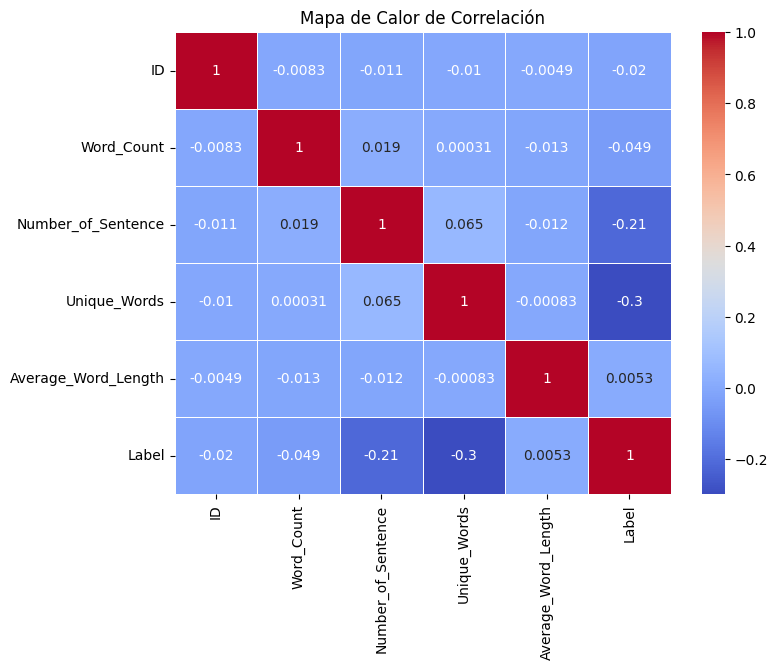

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Mapa de Calor de Correlación')
plt.show()

## Preprocesamiento de datos

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
target = 'Label'
non_scalers_features = ['ID','Label']
features = [col for col in df.columns if col not in non_scalers_features]

In [29]:
X = df[features].copy()
y = df[target].copy()

In [30]:
sc = StandardScaler()
Xs = pd.DataFrame(sc.fit_transform(X),columns = features)
Xs.head(5)

,Word_Count,Number_of_Sentence,Unique_Words,Average_Word_Length
0,-1.766548,-1.448191,-0.081749,1.048929
1,-1.766548,-0.274299,0.004911,0.745197
2,-1.766548,-0.567772,-0.601705,-0.302938
3,-1.766548,-0.861245,-0.601705,-0.005798
4,-1.766548,-1.448191,-0.341727,-0.740959


## Modelado y predicción

In [31]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_auc_score
Xt, Xv, yt, yv = train_test_split(Xs,y, train_size=0.7)

In [32]:
def entrenar(param, modelo, X,y):
    grid = RandomizedSearchCV(param_distributions=param,
                             n_jobs=-1,
                             n_iter=10,
                             cv=4,
                             estimator=modelo,
                             error_score='raise')
    grid.fit(X,y)
    return grid, grid.best_estimator_, grid.best_score_, grid.best_params_

In [33]:
def metricas(Xt, Xv, yt, yv, modelo):
    d = {'train':round(roc_auc_score(y_true=yt, y_score=modelo.predict_proba(Xt)[:,1]),3),
         'validate':round(roc_auc_score(y_true=yv, y_score=modelo.predict_proba(Xv)[:,1]),3)
        }
    return d

### SVM

In [34]:
from sklearn.svm import SVC
param_svc = dict(C = np.arange(0,2,0.1),
             kernel = ['linear','poly','rbf','sigmoid'],
             degree = range(2,6),
             gamma = ['scale','auto'],
             probability = [True])

In [36]:
modelo_sv = SVC()
modelo_sv, best_estimator, score, params = entrenar(param_svc, modelo_sv, Xt, yt)
metricas(Xt,Xv,yt,yv,modelo_sv)

{'train': 0.926, 'validate': 0.927}

### Arbol de decision

In [37]:
from sklearn.tree import DecisionTreeClassifier
param_tree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None] + list(range(2, 5)),
    'min_samples_split': list(range(2, 4)),
    'min_samples_leaf': list(range(2, 4)),
    'max_features': [None] + [i * .05 for i in range(2, 4)],
    'max_leaf_nodes': [None] + list(range(2, 10)),
    'min_impurity_decrease': [x * .10 for x in range(2, 4)],
    'class_weight': [None, 'balanced']
}

In [38]:
modelo_tree = DecisionTreeClassifier()
modelo_tree, best_estimator, score, params = entrenar(param_tree, modelo_tree, Xt, yt)
metricas(Xt,Xv,yt,yv,modelo_tree)

{'train': 0.878, 'validate': 0.886}

### Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
param = dict(n_estimators=list(range(1, 100, 25)),
                                    criterion=['gini', 'entropy'],
                                    max_depth=[x for x in list(range(2, 5))] + [None],
                                    min_samples_split=[x for x in list(range(2, 4))],
                                    min_samples_leaf=[x for x in list(range(2, 4))],
                                    max_features=[None] + [i * .05 for i in list(range(2, 4))],
                                    max_leaf_nodes=list(range(2, 10)) + [None],
                                    min_impurity_decrease=[x * .10 for x in list(range(2, 4))],
                                    oob_score=[True,False],
                                    warm_start=[True, False],
                                    class_weight=[None, 'balanced'],
                                    max_samples=[None],)

In [40]:
modelo = RandomForestClassifier()
modelo, best_estimator, score, params = entrenar(param, modelo, Xt, yt)
metricas(Xt,Xv,yt,yv,modelo)

{'train': 0.771, 'validate': 0.769}

### Red neuronal

In [41]:
from sklearn.neural_network import MLPClassifier
import numpy as np
param_mlpc = dict(hidden_layer_sizes = [(a,b,c,) for a in range(len(features), len(features)*2) for b in range(len(features), len(features)*2) for c in range(len(features), len(features)*2)],
             activation = ['identity', 'logistic', 'tanh', 'relu'],
             solver = ['lbfgs', 'sgd', 'adam'],
             alpha = np.arange(0.0001, 0.001, 0.0001),
             learning_rate = ['constant', 'invscaling', 'adaptive'])

In [42]:
modelo_mlpc = MLPClassifier()
modelo_mlpc, best_estimator_mlpc, score_mlpc, params_mlpc = entrenar(param_mlpc, modelo_mlpc, Xt, yt)
metricas(Xt,Xv,yt,yv,modelo_mlpc)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


{'train': 0.917, 'validate': 0.909}

### KNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier
param_knn = {
    'n_neighbors': list(range(1, 10)),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': list(range(10, 40, 10)),
    'p': [1, 2]
}

In [44]:
modelo_knn = KNeighborsClassifier()
modelo_knn, best_estimator, score, params = entrenar(param_knn, modelo_knn, Xt, yt)
metricas(Xt,Xv,yt,yv,modelo_knn)

{'train': 0.95, 'validate': 0.918}

### Ada Boost

In [45]:
from sklearn.ensemble import AdaBoostClassifier
param_adab = dict(n_estimators = range(2,10),
             learning_rate = np.arange(0.1,1,0.1),
             algorithm = ['SAMME.R'])

In [46]:
modelo_ada = AdaBoostClassifier()
modelo_ada, best_estimator, score, params = entrenar(param_adab, modelo_ada, Xt, yt)
metricas(Xt,Xv,yt,yv,modelo_ada)

{'train': 0.93, 'validate': 0.936}